# Example Naive Bayes model

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import  train_test_split

In [3]:
path ='/content/drive/MyDrive/Social_Network_Ads.csv'
df_social = pd.read_csv(path)

In [ ]:
df_social.loc[:,'EstimatedSalary']

In [ ]:
df_social.head()

In [ ]:
df_social.info()

In [28]:
x = df_social.loc[:,['Age','EstimatedSalary']].values
y = df_social.loc[:,'Purchased'].values

In [30]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [35]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()

In [ ]:
nb.fit(train_x, train_y)

In [43]:
y_pred = nb.predict(test_x)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
cm

array([[74,  3],
       [ 8, 35]])

In [46]:
print('mis classified samples %d' % (test_y != y_pred).sum())
print(len(test_y))

mis classified samples 11
120


In [47]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(test_y, y_pred)
ac

0.9083333333333333

# Spam Classifier

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path ='/content/drive/MyDrive/sms_spam.csv'
df = pd.read_csv(path, encoding='latin-1')
df.columns = ['label', 'message']
df.head()

In [ ]:
df.groupby('label').describe()

<Axes: xlabel='label', ylabel='count'>

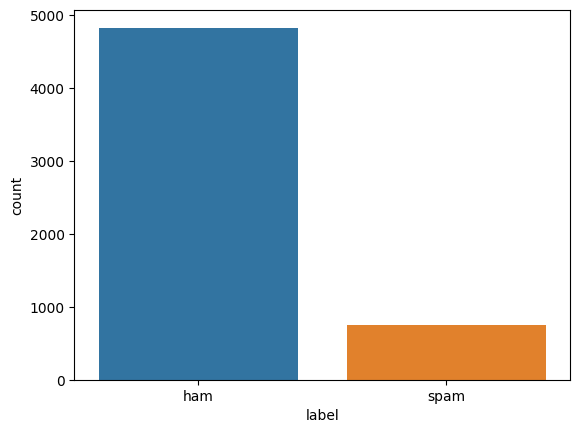

In [44]:
sns.countplot(data=df, x='label')

In [ ]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
import nltk
nltk.download('stopwords')

In [45]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [ ]:
# Testing
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

In [ ]:
# Test with our dataset
df['message'][:20].apply(process)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])

In [55]:
mess = df.iloc[2]['message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [56]:
print(tfidfv.transform([mess]))

  (0, 7824)	0.1892225098037307
  (0, 7790)	0.14448099132488007
  (0, 7353)	0.12346950677633907
  (0, 7171)	0.2192719826044076
  (0, 7028)	0.11769758373520282
  (0, 5916)	0.16041653335510167
  (0, 5874)	0.23324419176825587
  (0, 5827)	0.23324419176825587
  (0, 4635)	0.15798362313799344
  (0, 3117)	0.11515135503852864
  (0, 2993)	0.1668399149041627
  (0, 2891)	0.46648838353651173
  (0, 2771)	0.35749365143918377
  (0, 2266)	0.2003128761353243
  (0, 2096)	0.19532597883008934
  (0, 1194)	0.1668399149041627
  (0, 844)	0.2192719826044076
  (0, 434)	0.22537545163076622
  (0, 421)	0.22537545163076622
  (0, 414)	0.09975793224196049
  (0, 72)	0.23324419176825587


In [ ]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names_out()[i],sep='\t')

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

In [61]:
spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7d647b1fda20>)),
                ('classifier', MultinomialNB())])

In [62]:
predictions = spam_filter.predict(x_test)

In [63]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 35


In [ ]:
x_test[y_test != predictions]

In [67]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1002
        spam       0.77      0.98      0.86       113

    accuracy                           0.97      1115
   macro avg       0.88      0.97      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [66]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'